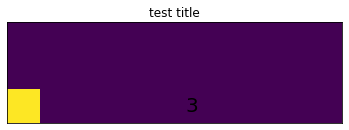

In [127]:
# import os
# import sys
# sys.path.append(os.getcwd())
import matplotlib.pyplot as plt
import numpy as np

data = np.zeros([3,10]).astype(np.uint8)
data[2,0] = 1
fig, ax = plt.subplots()
# ax.set_axis_off()
ax.set_title('test title')
ax.annotate(3, (5,2), ha='center', va='center', fontsize=20)
ax.imshow(data)
# ax.hlines(y=np.arange(0, 5)+0.5, xmin=np.full(5, 0)-0.5, xmax=np.full(5, 5)-0.5, color="black")
# ax.vlines(x=np.arange(0, 10)+0.5, ymin=np.full(10, 0)-0.5, ymax=np.full(10, 10)-0.5, color="black")
ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

In [105]:
np.arange(0, 3-1)+0.5

array([0.5, 1.5])

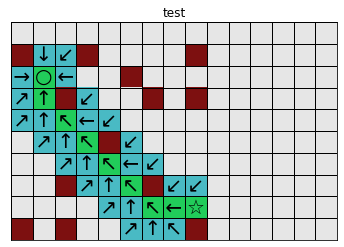

In [126]:
from graph_engine import Grid 
COLOR_WALL = (125, 16, 16)
COLOR_PASSABLE = (255, 255, 255)
COLOR_PATH = (33, 204, 90) # green
COLOR_SEARCHED = (73, 186, 196)
pixel_fontsize = 20
def plot_details(ax, graph, id, style): # id: horizontal, vertical
    pixel_color = COLOR_PASSABLE
    r = ''
    if 'number' in style and id in style['number']: 
        r = " %d" % style['number'][id]
    if 'point_to' in style and style['point_to'].get(id, None) is not None:
        (x1, y1) = id
        (x2, y2) = style['point_to'][id]
        if x2 == x1 + 1 and y1 == y2: r = " → "
        if x2 == x1 - 1 and y1 == y2: r = " ← "
        if y2 == y1 + 1 and x1 == x2: r = " ↓ "
        if y2 == y1 - 1 and x1 == x2: r = " ↑ "
        if x2 == x1 + 1 and y2 == y1 + 1: r = " ↘ "
        if x2 == x1 + 1 and y2 == y1 - 1: r = " ↗ "
        if x2 == x1 - 1 and y2 == y1 + 1: r = " ↙ "
        if x2 == x1 - 1 and y2 == y1 - 1: r = " ↖ "
        pixel_color = COLOR_SEARCHED
    if 'path' in style and id in style['path']:   
        pixel_color = COLOR_PATH
    if 'start' in style and id == style['start']: r = "○"
    if 'goal' in style and id == style['goal']:   r = "☆"
    if id in graph.walls:
        pixel_color = COLOR_WALL
    # notice that in ax.annotate need horizontal x and vertical y
    # while ax.imshow need horizontal y and vertical x
    ax.annotate(r, id, ha='center', va='center', fontsize=pixel_fontsize)
    return ax, pixel_color

def plot_grid(ax, graph:Grid, **details):
    data = np.zeros([graph.height, graph.width, 3]).astype(np.uint8) # height, width, channel
    for y in range(graph.height):
        for x in range(graph.width):
            ax, pixel_color = plot_details(ax, graph, (x,y), details)
            data[y, x, :] = pixel_color
    # notice that in ax.annotate need horizontal x and vertical y
    # while ax.imshow need horizontal y and vertical x
    ax.imshow(data)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
    ax.hlines(y=np.arange(0, graph.height+1)-0.5, 
              xmin=np.full(graph.height+1, 0)-0.5, 
              xmax=np.full(graph.height+1, graph.width)-0.5, 
              color="black", linewidth=1)
    ax.vlines(x=np.arange(0, graph.width+1)-0.5, 
              ymin=np.full(graph.width+1, 0)-0.5, 
              ymax=np.full(graph.width+1, graph.height)-0.5, 
              color="black", linewidth=1)    
    return ax 


from graph_engine import WeightedGrid, get_path_trace_back
from Astar import A_star

grid1 = WeightedGrid(15, 10)
grid1.walls = [(0, 1),(3, 1),(8, 1),(5, 2),(2, 3),(6, 3),(8, 3),(4, 5),(2, 7),(6, 7),(0, 9),(2, 9),(8, 9)]
start1 = (1, 2)
goal1 = (8, 8)

came_from1, cost1 = A_star(grid1, start1, goal1)
fig, ax = plt.subplots()
# plot_grid(ax, grid1, point_to=came_from1, start=start1, goal=goal1)
# plt.show()
plot_grid(ax, grid1, point_to=came_from1, path=get_path_trace_back(came_from1, start1, goal1), start=start1, goal=goal1)
# plt.show()
ax.set_title('test')
# plt.savefig('test.pdf', bbox_inches='tight', transparent=True, dpi=200)

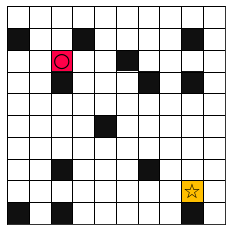

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from graph_engine import WeightedGrid, get_path_trace_back
from Astar import A_star, A_star_display
from viz_engine import plot_grid, tellme

grid1 = WeightedGrid(10, 10)
grid1.walls = [(0, 1),(3, 1),(8, 1),(5, 2),(2, 3),(6, 3),(8, 3),(4, 5),(2, 7),(6, 7),(0, 9),(2, 9),(8, 9)]
start1 = (2, 2)
goal1 = (8, 8)

fig, ax = plt.subplots()
plot_grid(ax, grid1, start=start1, goal=goal1) # update image
plt.savefig('fig/default_grid.pdf', bbox_inches='tight', transparent=True, dpi=200)

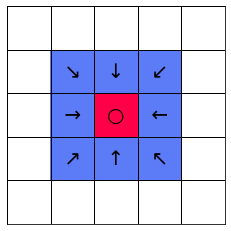

In [7]:
grid = WeightedGrid(5,5)
start = (2, 2)
point_to = {(1,1):(2, 2), (1,2):(2, 2), (1, 3):(2, 2), (2,1):(2,2), (2,3):(2,2), (3,1):(2,2), (3,2):(2,2), (3,3):(2,2)}
fig, ax = plt.subplots()
plot_grid(ax, grid, start=start, point_to=point_to) # update image
plt.savefig('fig/statespace.pdf', bbox_inches='tight', transparent=True, dpi=200)

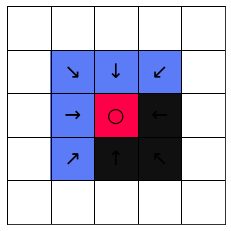

In [11]:
grid = WeightedGrid(5,5)
grid.walls = [(3,3),(2,3),(3,2)]
start = (2, 2)
point_to = {(1,1):(2, 2), (1,2):(2, 2), (1, 3):(2, 2), (2,1):(2,2), (2,3):(2,2), (3,1):(2,2), (3,2):(2,2), (3,3):(2,2)}
fig, ax = plt.subplots()
plot_grid(ax, grid, start=start, point_to=point_to) # update image
plt.savefig('fig/statespace_obstacle.pdf', bbox_inches='tight', transparent=True, dpi=200)

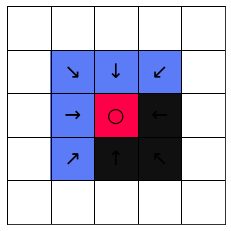

In [23]:
import os
from time import gmtime, strftime
folder_name = strftime("%Y-%m-%d-%H-%M", gmtime())
if not os.path.exists(folder_name):
    os.system('mkdir '+folder_name)
grid = WeightedGrid(5,5)
grid.walls = [(3,3),(2,3),(3,2)]
start = (2, 2)
point_to = {(1,1):(2, 2), (1,2):(2, 2), (1, 3):(2, 2), (2,1):(2,2), (2,3):(2,2), (3,1):(2,2), (3,2):(2,2), (3,3):(2,2)}
fig, ax = plt.subplots()
plot_grid(ax, grid, start=start, point_to=point_to) # update image
plt.savefig(os.path.join(folder_name, 'statespace_obstacle.pdf'), bbox_inches='tight', transparent=True, dpi=200)

In [28]:
cnt = 2
f'step%03d.pdf'%cnt

'step002.pdf'